# Example with Recurrent Neural Networks - IMDB dataset

RNNs, while processing, pass the previous hidden state to the next step of the sequence. The hidden state acts as the neural networks memory. It holds information on previous data the network has seen before. The tanh activation is used to help regulate the values flowing through the network, ensuring that the values stay between -1 and 1, thus regulating the output of the neural network.

#### Load and pre-process the dataset

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Define and train the RNN model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
# This model is a 'Many to One', this meaning the output is only given in the end
# When resorting to a 'Many to Many' model, the argument "return_sequences" must be set to True, allowing output for recurrent connections

model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 27s 159ms/step - loss: 0.6086 - acc: 0.6564 - val_loss: 0.4534 - val_acc: 0.7990
Epoch 2/5
157/157 [==============================] - 37s 236ms/step - loss: 0.3778 - acc: 0.8436 - val_loss: 0.3795 - val_acc: 0.8406
Epoch 3/5
157/157 [==============================] - 31s 198ms/step - loss: 0.3009 - acc: 0.8760 - val_loss: 0.4676 - val_acc: 0.7900
Epoch 4/5
157/157 [==============================] - 30s 193ms/step - loss: 0.2320 - acc: 0.9097 - val_loss: 0.3924 - val_acc: 0.8604
Epoch 5/5
157/157 [==============================] - 29s 185ms/step - loss: 0.1688 - acc: 0.9394 - val_loss: 0.4033 - val_acc: 0.8324


#### Plot the training and testing set accuracy and loss

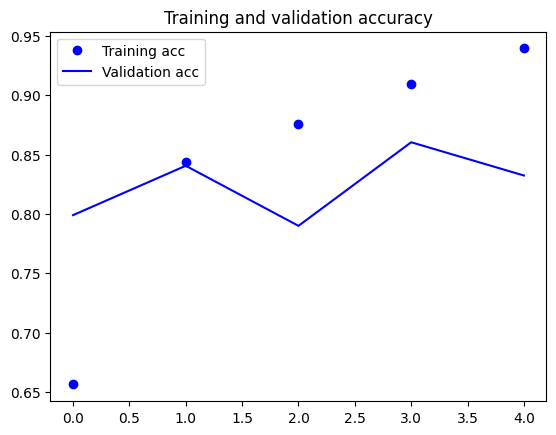

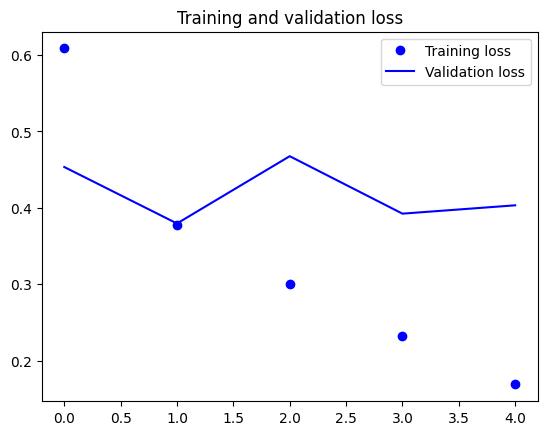

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#### Evaluate the model's performance

In [10]:
results = model.evaluate(input_test, y_test, verbose = 0)
print(results)

[0.39784738421440125, 0.8354399800300598]


## RNN model with multiple layers

In [11]:
model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [=============================

#### Plot the training and testing set accuracy and loss

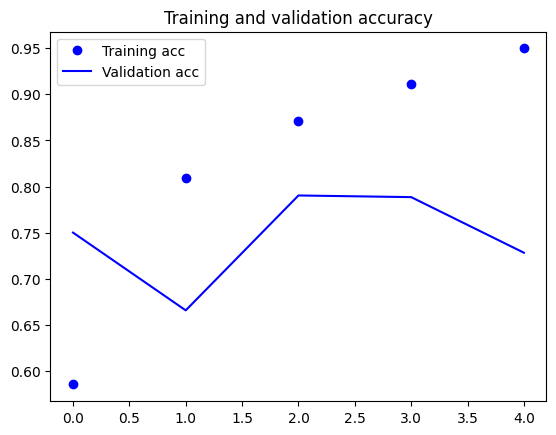

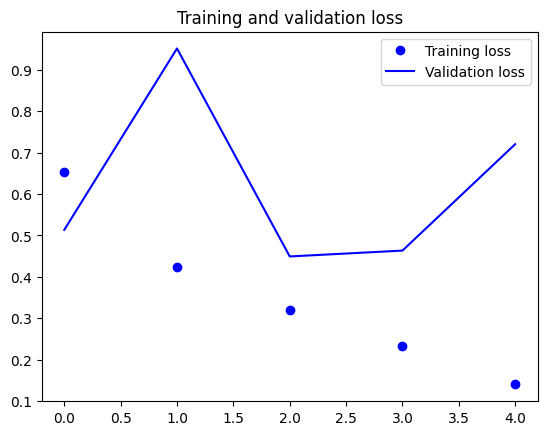

In [13]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Evaluate the model's performance

In [14]:
results = model2.evaluate(input_test, y_test, verbose = 0)
print(results)

[0.7338844537734985, 0.7302799820899963]
